# **Load Modules**

In [ ]:
!pip install Keras-Preprocessing
!pip install ktrain

In [2]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re

import ktrain
from ktrain import text
import time

sns.set()
%matplotlib inline



In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
datafolder='/content/drive/MyDrive/Community Help /category classification/Data/'
modelfolder='/content/drive/MyDrive/Community Help /category classification/Model/'
arrayfolder='/content/drive/MyDrive/Community Help /category classification/NumPyArrays/'

# **============== Machine Learing Models ==================**

## **Load NumPy arrays for ML Models**

In [ ]:
x_train_counts = joblib.load(modelfolder+"x_train_counts.pkl")
x_train_tfidf = joblib.load(modelfolder+"x_train_tfidf.pkl")
x_test_counts = joblib.load(modelfolder+"x_test_counts.pkl")
x_test_tfidf = joblib.load(modelfolder+"x_test_tfidf.pkl")

x_train = joblib.load(modelfolder+"x_train.pkl")
x_test = joblib.load(modelfolder+"x_test.pkl")
y_train = joblib.load(modelfolder+"y_train.pkl")
y_test = joblib.load(modelfolder+"y_test.pkl")

count_vect = joblib.load(modelfolder+"count_vect.pkl")


In [ ]:
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_tfidf = transformer.transform(x_test_counts)


In [ ]:
print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(590037, 6718227) (196680, 6718227) (590037,) (196680,)


## **Machine Learning Models**

### **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.8840400650803335
                      precision    recall  f1-score   support

            BUSINESS       0.88      0.88      0.88     41103
       ENTERTAINMENT       0.93      0.93      0.93     43025
           GENERAL-1       0.86      0.86      0.86     37506
            POLITICS       0.85      0.87      0.86     39321
SCIENCE & TECHNOLOGY       0.90      0.89      0.89     35725

            accuracy                           0.88    196680
           macro avg       0.88      0.88      0.88    196680
        weighted avg       0.88      0.88      0.88    196680



In [ ]:
mc = count_vect.transform(["howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an attack mongrel shows labour is rattled by the opposition. in an upbeat speech to his party s spring conference in brighton he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate. something tells me that someone somewhere out there is just a little bit rattled mr howard said. mr hain leader of the commons told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an attack mongrel and playing opposition for opposition sake . mr howard told his party that labour would do anything say anything claim anything to cling on to office at all costs . so far this year they have compared me to fagin to shylock and to a flying pig. this morning peter hain even called me a mongrel. i don t know about you but something tells me that someone somewhere out there is just a little bit rattled. environment secretary margaret beckett rejected mr howard s comment telling radio 4 s pm programme that labour was not rattled . we have a very real duty to try to get people to focus on michael howard s record what the proposals are that he is trying to put forward to the country and also the many examples we are seeing now of what we believe is really poor judgement on his behalf. mr howard said tory policies on schools taxes immigration and crime were striking a chord with voters. since the beginning of this year - election year - we ve been making the political weather he told the party conference. mr howard denied he had been playing politics by raising the case of margaret dixon whose operation had been cancelled seven times which grabbed headlines for the party two weeks ago. and he hit back at labour claims he had used mrs dixon as a human shield . she s not a human shield mr blair she s a human being. mr howard said his party plans for immigration quotas which have also been the focus of much media coverage were not racist - just common sense . he pledged cleaner hospitals and better school discipline with a promise to get rid of political correctness in the national curriculum and give everyone to the same chance of a decent state education as he had. i come from an ordinary family. if the teenage michael howard were applying to cambridge today gordon brown would love me. and he stressed his party s commitment to cut taxes and red tape and increase the basic state pension in line with earnings. he finished with a personal appeal to party activists to go out and win the next election. one day you will be able to tell your children and grandchildren as i will tell mine i was there. i did my bit. i played my part. i helped to win that famous election - the election that transformed our country for the better . labour election co-ordinator alan milburn said: michael howard s speech today confirms what we have always said - that his only strategy is opportunism but he has no forward vision for the country. in reference to the appearance of mr howard s family on the conference stage with him mr milburn said: michael howard is perfectly entitled to pose with his family today. but it is the hard working families across britain that will be damaged by his plan to cut £35bn from public spending."])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['POLITICS']


In [ ]:
mc = count_vect.transform(["health is good "])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['GENERAL-1']


In [ ]:
joblib.dump(lr, modelfolder+'lr.pkl')
joblib.dump(y_pred1, modelfolder+'y_pred1.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/lr.pkl']

###  **Support Vector Machine**

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8923733984136669
                      precision    recall  f1-score   support

            BUSINESS       0.89      0.89      0.89     41103
       ENTERTAINMENT       0.94      0.93      0.93     43025
           GENERAL-1       0.88      0.86      0.87     37506
            POLITICS       0.85      0.88      0.87     39321
SCIENCE & TECHNOLOGY       0.90      0.90      0.90     35725

            accuracy                           0.89    196680
           macro avg       0.89      0.89      0.89    196680
        weighted avg       0.89      0.89      0.89    196680



In [ ]:
mc = count_vect.transform(["To combat this trend, we need politicians who are willing to stand up for the interests of the working class. We need leaders who are committed to creating a more just and equitable society, where everyone has a chance to succeed regardless of their background."])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['POLITICS']


In [ ]:
joblib.dump(svc, modelfolder+'Text_SVM.pkl')
joblib.dump(y_pred2, modelfolder+'y_pred2.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/Text_SVM.pkl']

###  **Naive Bayes(Multinomial)**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.8382855399633923
                      precision    recall  f1-score   support

            BUSINESS       0.89      0.82      0.86     41103
       ENTERTAINMENT       0.96      0.88      0.92     43025
           GENERAL-1       0.93      0.71      0.81     37506
            POLITICS       0.63      0.96      0.76     39321
SCIENCE & TECHNOLOGY       0.92      0.81      0.86     35725

            accuracy                           0.84    196680
           macro avg       0.87      0.84      0.84    196680
        weighted avg       0.87      0.84      0.84    196680



In [ ]:
mc = count_vect.transform(["One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['POLITICS']


In [ ]:
joblib.dump(mnb, modelfolder+'mnb.pkl')
joblib.dump(y_pred3, modelfolder+'y_pred3.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/mnb.pkl']

###  **Randomforest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.6603823469595281
                      precision    recall  f1-score   support

            BUSINESS       0.73      0.67      0.70     41103
       ENTERTAINMENT       0.52      0.94      0.67     43025
           GENERAL-1       0.73      0.58      0.65     37506
            POLITICS       0.81      0.38      0.52     39321
SCIENCE & TECHNOLOGY       0.78      0.70      0.73     35725

            accuracy                           0.66    196680
           macro avg       0.71      0.66      0.65    196680
        weighted avg       0.71      0.66      0.65    196680



In [ ]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['POLITICS']


In [ ]:
joblib.dump(rfc, modelfolder+'rfc.pkl')
joblib.dump(y_pred4, modelfolder+'y_pred4.pkl')


['/content/drive/MyDrive/Community Help /category classification/Model/rfc.pkl']

###  **GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.5425          331.31m
         2           1.4954          326.55m
         3           1.4584          321.68m
         4           1.4285          317.86m
         5           1.4036          314.48m
         6           1.3813          310.91m
         7           1.3606          307.25m
         8           1.3422          304.00m
         9           1.3261          300.43m
        10           1.3108          296.55m
        20           1.2045          262.89m
        30           1.1375          229.83m
        40           1.0885          196.88m
        50           1.0499          163.82m
        60           1.0178          130.68m
        70           0.9901           97.75m
        80           0.9659           65.14m
        90           0.9435           32.59m
       100           0.9243            0.00s
0.7237238153345535
                      precision    recall  f1-score   support

            BUSIN

In [ ]:
joblib.dump(gbc, modelfolder+'gbc.pkl')
joblib.dump(y_pred5, modelfolder+'y_pred5.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/gbc.pkl']

###  **Ensemble Classifier**

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

In [ ]:
#mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
#m = transformer.transform(mc)
#y_pred = mnb.predict(m)
#print(y_pred)

In [ ]:
joblib.dump(ec, modelfolder+'Text_Ensemble.pkl')
joblib.dump(y_pred6, modelfolder+'y_pred6.pkl')

###  **AdaBoost with Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

Accuracy: 0.7793369941020948
                      precision    recall  f1-score   support

            BUSINESS       0.64      0.90      0.75     41103
       ENTERTAINMENT       0.78      0.91      0.84     43025
           GENERAL-1       0.81      0.73      0.77     37506
            POLITICS       0.92      0.64      0.76     39321
SCIENCE & TECHNOLOGY       0.90      0.69      0.78     35725

            accuracy                           0.78    196680
           macro avg       0.81      0.77      0.78    196680
        weighted avg       0.80      0.78      0.78    196680



In [ ]:
joblib.dump(abc, modelfolder+'rfcadaboost.pkl')
joblib.dump(y_pred7, modelfolder+'y_pred7.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/y_pred7.pkl']

## **Comparison Between ML Models**

In [ ]:
y_test=joblib.load(modelfolder+"y_test.pkl")

y_pred1 = joblib.load(modelfolder+"y_pred1.pkl")
y_pred2 = joblib.load(modelfolder+"y_pred2.pkl")
y_pred3 = joblib.load(modelfolder+"y_pred3.pkl")
y_pred4 = joblib.load(modelfolder+"y_pred4.pkl")
y_pred5 = joblib.load(modelfolder+"y_pred5.pkl")
y_pred5 = joblib.load(modelfolder+"y_pred6.pkl")
y_pred5 = joblib.load(modelfolder+"y_pred7.pkl")


In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

##  **CROSS VAL SCORE FOR ML MODELS**

In [ ]:
x_train_counts = joblib.load(modelfolder+"x_train_counts.pkl")
x_train_tfidf = joblib.load(modelfolder+"x_train_tfidf.pkl")
x_test_counts = joblib.load(modelfolder+"x_test_counts.pkl")
x_test_tfidf = joblib.load(modelfolder+"x_test_tfidf.pkl")

x_train = joblib.load(modelfolder+"x_train.pkl")
x_test = joblib.load(modelfolder+"x_test.pkl")
y_train = joblib.load(modelfolder+"y_train.pkl")
y_test = joblib.load(modelfolder+"y_test.pkl")

count_vect = joblib.load(modelfolder+"count_vect.pkl")

transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

##### **LR**

In [ ]:
#lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr = joblib.load(modelfolder+"lr.pkl")

scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

##### **SVM**

In [ ]:
svc = joblib.load(modelfolder+"Text_SVM.pkl")
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

##### **MNB**

In [ ]:
mnb = joblib.load(modelfolder+"mnb.pkl")

scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)


##### **RFC**

In [ ]:
mnb = joblib.load(modelfolder+"rfc.pkl")

scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

##### **GBC**

In [ ]:
gbc = joblib.load(modelfolder+"gbc.pkl")

scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

##### **Ensemble Classifier**

In [ ]:
ec = joblib.load(modelfolder+"Text_Ensemble.pkl")

scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

##### **AdaBoost with Random Forest Classifier**

In [ ]:
abc = joblib.load(modelfolder+"rfcadaboost.pkl")

scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

# **============== Deep Learing Models ==================**

## **Model #1**

### **Load NumPy arrays**

In [6]:
XX_train = joblib.load(arrayfolder+"XX_train_model1_d.pkl")
XX_test = joblib.load(arrayfolder+"XX_test_model1_d.pkl")
y_train = joblib.load(arrayfolder+"yy_train_model1_d.pkl")
y_test = joblib.load(arrayfolder+"yy_test_model1_d.pkl")
#X_DeepLearning = joblib.load(arrayfolder+"X_DeepLearning_model1_d.pkl")
sequences = joblib.load(arrayfolder+"sequences_model1_d.pkl")
vocabulary_size = joblib.load(arrayfolder+"vocabulary_size_model1_d.pkl")
max_text_len = joblib.load(arrayfolder+"max_text_len_model1_d.pkl")

In [ ]:
#X_DeepLearning = joblib.load(arrayfolder+"X_DeepLearning_model1_d.pkl")

In [7]:
XX_train.shape,XX_test.shape,y_train.shape,y_test.shape,len(sequences),max_text_len

((590037, 768), (196680, 768), (590037, 5), (196680, 5), 786717, 768)

In [8]:
# Split the data for training
X1, X_valid, Y1, y_valid = train_test_split(XX_train, y_train,
                                                      train_size=0.4, test_size=0.1,
                                                      random_state=0,stratify = y_train)
X1.shape,X_valid.shape,Y1.shape,y_valid.shape

((236014, 768), (59004, 768), (236014, 5), (59004, 5))

In [14]:
# Split the data for training
X1, X_valid, Y1, y_valid = train_test_split(X1, Y1,
                                                      train_size=0.4, test_size=0.1,
                                                      random_state=0,stratify = Y1)
X1.shape,X_valid.shape,Y1.shape,y_valid.shape

((94405, 768), (23602, 768), (94405, 5), (23602, 5))

### **LSTM 1-Layer**

In [9]:
epochs = 25
emb_dim = 256
batch_size = 200

In [ ]:
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X1.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(5, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 768, 256)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 600)              1336800   
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 600)               0         
                                                                 
 flatten_3 (Flatten)         (None, 600)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-1-layer-best_model-model1-768.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm1 = model_lstm1.fit(X1, Y1, epochs = epochs, batch_size = batch_size, validation_data=(X_valid,y_valid), callbacks=callbacks)

Epoch 1/25
1181/1181 [==============================] - ETA: 0s - loss: 0.8297 - acc: 0.6906
Epoch 1: val_acc improved from -inf to 0.63836, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-1-layer-best_model-model1-768.h5
1181/1181 [==============================] - 5070s 4s/step - loss: 0.8297 - acc: 0.6906 - val_loss: 1.0714 - val_acc: 0.6384 - lr: 0.0010
Epoch 2/25
1181/1181 [==============================] - ETA: 0s - loss: 0.6348 - acc: 0.7885
Epoch 2: val_acc improved from 0.63836 to 0.84921, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-1-layer-best_model-model1-768.h5
1181/1181 [==============================] - 4992s 4s/step - loss: 0.6348 - acc: 0.7885 - val_loss: 0.4432 - val_acc: 0.8492 - lr: 0.0010
Epoch 3/25
1181/1181 [==============================] - ETA: 0s - loss: 0.4957 - acc: 0.8384
Epoch 3: val_acc improved from 0.84921 to 0.85604, saving model to /content/drive/MyDrive/Communit

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

In [ ]:
joblib.dump(history_lstm1, modelfolder+'lstm_1_history_lstm1-model1.pkl')

In [ ]:
acc = history_lstm1.history['acc']
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120
batch_size = 50
model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X1.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(5, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm2.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-2-layer-best_model-768.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(XX_test,y_test), callbacks=callbacks2)

In [ ]:
joblib.dump(history_lstm2, modelfolder+'lstm_2_history_lstm2.pkl')

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

In [ ]:
acc = history_lstm2.history['acc']
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **GRU**

In [15]:
epochs = 20
emb_dim = 256
batch_size = 50
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X1.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 768, 256)         0         
 lDropout1D)                                                     
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [16]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"gru-best_model.h5-768", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(X1, Y1, epochs=epochs, batch_size=batch_size,validation_data=(X_valid,y_valid), callbacks=callbacks3)

Epoch 1/20
1889/1889 [==============================] - ETA: 0s - loss: 0.8327 - acc: 0.6875
Epoch 1: val_acc improved from -inf to 0.83489, saving model to /content/drive/MyDrive/Community Help /category classification/Model/gru-best_model.h5-768
1889/1889 [==============================] - 4015s 2s/step - loss: 0.8327 - acc: 0.6875 - val_loss: 0.4821 - val_acc: 0.8349 - lr: 0.0010
Epoch 2/20
1889/1889 [==============================] - ETA: 0s - loss: 0.5424 - acc: 0.8186
Epoch 2: val_acc improved from 0.83489 to 0.84595, saving model to /content/drive/MyDrive/Community Help /category classification/Model/gru-best_model.h5-768
1889/1889 [==============================] - 3930s 2s/step - loss: 0.5424 - acc: 0.8186 - val_loss: 0.4483 - val_acc: 0.8459 - lr: 0.0010
Epoch 3/20
1889/1889 [==============================] - ETA: 0s - loss: 0.4791 - acc: 0.8405
Epoch 3: val_acc improved from 0.84595 to 0.85179, saving model to /content/drive/MyDrive/Community Help /category classification/Mo

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

In [ ]:
joblib.dump(history_gru, modelfolder+'history_gru.pkl')

In [ ]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 50
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(5, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"cnn+lastm-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

In [ ]:
joblib.dump(history_cl, modelfolder+'history_cl.pkl')

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

In [ ]:
acc = history_cl.history['acc']
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_category_model1['TITLE2'], df_category_model1['CATEGORY_CLASS_NEW'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['sport', 'business', 'politics','tech', 'entertainment']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

**Save Bert Model**

In [ ]:
predictor.save(modelfolder+"Bert_Model_Text_Classification")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'Bert_Model_Text_Classification')

In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

### **XLNet Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_category_model1['TITLE2'], df_category_model1['CATEGORY_CLASS_NEW'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['sport', 'business', 'politics','tech', 'entertainment'])

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

In [ ]:
predictor.save(modelfolder+"xlnet_model_Text_Classification")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'xlnet_model_Text_Classification')

In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)

## **Model #2**

### **Load NumPy arrays**

In [ ]:
XX_train = joblib.load(arrayfolder+"XX_train_model2_d.pkl")
XX_test = joblib.load(arrayfolder+"XX_test_model2_d.pkl")
y_train = joblib.load(arrayfolder+"yy_train_model2_d.pkl")
y_test = joblib.load(arrayfolder+"yy_test_model2_d.pkl")
#X_DeepLearning = joblib.load(arrayfolder+"X_DeepLearning_model2_d.pkl")
sequences = joblib.load(arrayfolder+"sequences_model2_d.pkl")
vocabulary_size = joblib.load(arrayfolder+"vocabulary_size_model2_d.pkl")
max_text_len = joblib.load(arrayfolder+"max_text_len_model2_d.pkl")
XX_train.shape,XX_test.shape,y_train.shape,y_test.shape,len(sequences),max_text_len

((141534, 768), (47179, 768), (141534, 4), (47179, 4), 188713, 768)

In [ ]:
# Split the data for training
X1, X_valid, Y1, y_valid = train_test_split(XX_train, y_train,
                                                      train_size=0.7, test_size=0.1,
                                                      random_state=0,stratify = y_train)
X1.shape,X_valid.shape,Y1.shape,y_valid.shape

((99073, 768), (14154, 768), (99073, 4), (14154, 4))

### **LSTM 1-Layer**

In [ ]:
epochs = 25
emb_dim = 256
batch_size = 200
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(4, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1336800   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-1-layer-best_model-model2.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm1 = model_lstm1.fit(X1, Y1, epochs = epochs, batch_size = batch_size, validation_data=(X_valid,y_valid), callbacks=callbacks)
joblib.dump(history_lstm1, modelfolder+'lstm_1_history_lstm1-model2.pkl')

Epoch 1/25
496/496 [==============================] - ETA: 0s - loss: 0.6978 - acc: 0.7157
Epoch 1: val_acc improved from -inf to 0.86230, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-1-layer-best_model-model2.h5
496/496 [==============================] - 2391s 5s/step - loss: 0.6978 - acc: 0.7157 - val_loss: 0.3979 - val_acc: 0.8623 - lr: 0.0010
Epoch 2/25
496/496 [==============================] - ETA: 0s - loss: 0.4341 - acc: 0.8488
Epoch 2: val_acc improved from 0.86230 to 0.88300, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-1-layer-best_model-model2.h5
496/496 [==============================] - 2343s 5s/step - loss: 0.4341 - acc: 0.8488 - val_loss: 0.3367 - val_acc: 0.8830 - lr: 0.0010
Epoch 3/25
496/496 [==============================] - ETA: 0s - loss: 0.3793 - acc: 0.8722
Epoch 3: val_acc improved from 0.88300 to 0.88887, saving model to /content/drive/MyDrive/Community Help /category c

KeyboardInterrupt: ignored

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

In [ ]:
history_lstm1=joblib.load(modelfolder+'lstm_1_history_lstm1-model2.pkl')
acc = history_lstm1.history['acc']
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120
batch_size = 50
model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X1.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(4, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 120)          1800000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 120)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 768, 400)         513600    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 768, 400)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 600)              1682400   
 nal)                                                            
                                                        

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-2-layer-best_mode2-768.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(X1, Y1, epochs=epochs, batch_size=batch_size, validation_data=(X_valid,y_valid), callbacks=callbacks2)

Epoch 1/20
1982/1982 [==============================] - ETA: 0s - loss: 0.6512 - acc: 0.7419
Epoch 1: val_acc improved from -inf to 0.86442, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-2-layer-best_mode2-768.h5
1982/1982 [==============================] - 17909s 9s/step - loss: 0.6512 - acc: 0.7419 - val_loss: 0.3822 - val_acc: 0.8644 - lr: 0.0010
Epoch 2/20
1982/1982 [==============================] - ETA: 0s - loss: 0.4541 - acc: 0.8454
Epoch 2: val_acc improved from 0.86442 to 0.87770, saving model to /content/drive/MyDrive/Community Help /category classification/Model/lastm-2-layer-best_mode2-768.h5
1982/1982 [==============================] - 17699s 9s/step - loss: 0.4541 - acc: 0.8454 - val_loss: 0.3510 - val_acc: 0.8777 - lr: 0.0010
Epoch 3/20
1982/1982 [==============================] - ETA: 0s - loss: 0.3909 - acc: 0.8690
Epoch 3: val_acc improved from 0.87770 to 0.88745, saving model to /content/drive/MyDrive/Community Help /cate

In [ ]:
joblib.dump(history_lstm2, modelfolder+'lstm_2_history_lstm2_mode2.pkl')

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

In [ ]:
acc = history_lstm2.history['acc']
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **GRU**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 200
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(4, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 64)                61824     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"gru-best_mode2.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(XX_test,y_test), callbacks=callbacks3)

Epoch 1/20
708/708 [==============================] - ETA: 0s - loss: 0.5910 - acc: 0.7630
Epoch 1: val_acc improved from -inf to 0.87853, saving model to /content/drive/MyDrive/Community Help /category classification/Model/gru-best_mode2.h5
708/708 [==============================] - 5716s 8s/step - loss: 0.5910 - acc: 0.7630 - val_loss: 0.3508 - val_acc: 0.8785 - lr: 0.0010
Epoch 2/20
708/708 [==============================] - ETA: 0s - loss: 0.3662 - acc: 0.8738
Epoch 2: val_acc improved from 0.87853 to 0.88906, saving model to /content/drive/MyDrive/Community Help /category classification/Model/gru-best_mode2.h5
708/708 [==============================] - 5666s 8s/step - loss: 0.3662 - acc: 0.8738 - val_loss: 0.3186 - val_acc: 0.8891 - lr: 0.0010
Epoch 3/20
708/708 [==============================] - ETA: 0s - loss: 0.3263 - acc: 0.8894
Epoch 3: val_acc improved from 0.88906 to 0.89110, saving model to /content/drive/MyDrive/Community Help /category classification/Model/gru-best_mode2

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

In [ ]:
joblib.dump(history_gru, modelfolder+'history_gru_mode2.pkl')

In [ ]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 200
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(4, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 768, 64)           98368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 384, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 379, 32)           12320     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 189, 32)         

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"cnn+lastm-best_mode2.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

Epoch 1/20
637/637 [==============================] - ETA: 0s - loss: 0.6989 - acc: 0.7186
Epoch 1: val_acc improved from -inf to 0.86117, saving model to /content/drive/MyDrive/Community Help /category classification/Model/cnn+lastm-best_mode2.h5
637/637 [==============================] - 1646s 3s/step - loss: 0.6989 - acc: 0.7186 - val_loss: 0.4066 - val_acc: 0.8612 - lr: 0.0010
Epoch 2/20
637/637 [==============================] - ETA: 0s - loss: 0.4114 - acc: 0.8624
Epoch 2: val_acc improved from 0.86117 to 0.88385, saving model to /content/drive/MyDrive/Community Help /category classification/Model/cnn+lastm-best_mode2.h5
637/637 [==============================] - 1592s 2s/step - loss: 0.4114 - acc: 0.8624 - val_loss: 0.3392 - val_acc: 0.8838 - lr: 0.0010
Epoch 3/20
637/637 [==============================] - ETA: 0s - loss: 0.3568 - acc: 0.8833
Epoch 3: val_acc improved from 0.88385 to 0.88929, saving model to /content/drive/MyDrive/Community Help /category classification/Model/cn

In [ ]:
joblib.dump(history_cl, modelfolder+'history_cnnlstm_mode2.pkl')

['/content/drive/MyDrive/Community Help /category classification/Model/history_cnnlstm_mode2.pkl']

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

Test results - Loss: 0.3512522280216217 - Accuracy: 88.92939686775208%


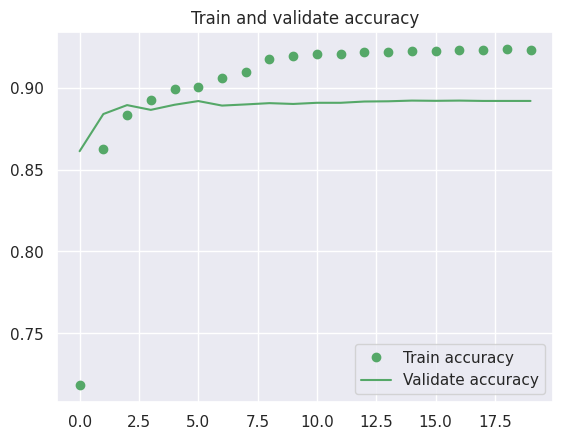

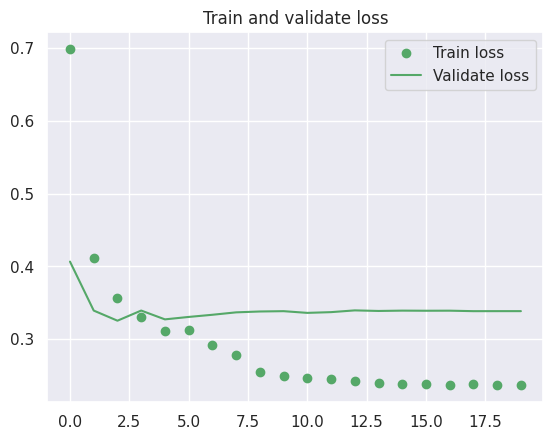

In [ ]:
acc = history_cl.history['acc']
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **Help**

In [ ]:
def DataPreparationforML(filename):
  df_category_model = pd.read_csv(datafolder+filename)
  df_category_model.drop(columns=['Unnamed: 0'],inplace=True)
  #print(filename +' Shape : '+df_category_model.shape)
  df_category_model['TITLE']=df_category_model['TITLE'].fillna("")
  df_category_model.isna().sum()
  df_category_model['lower_case'] = df_category_model['TITLE'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
  df_category_model['alphabatic'] = df_category_model['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
  df_category_model['without-link'] = df_category_model['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))
  tokenizer = RegexpTokenizer(r'\w+')
  df_category_model['Special_word'] = df_category_model.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)
  stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]
  df_category_model['stop_words'] = df_category_model['Special_word'].apply(lambda x: [item for item in x if item not in stop])
  df_category_model['stop_words'] = df_category_model['stop_words'].astype('str')
  df_category_model['short_word'] = df_category_model['stop_words'].str.findall('\w{2,}')
  df_category_model['string']=df_category_model['short_word'].str.join(' ')
  df_category_model['TITLE2'] = df_category_model['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return df_category_model


In [ ]:
df_category_model2=DataPreparationforML('df_category_model2.csv')

### **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_category_model2['TITLE2'], df_category_model2['CATEGORY_CLASS_NEW'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
Category_class2=['GENERAL-2', 'HEALTH', 'SPORTS', 'WORLD NEWS']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=Category_class2,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3


In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

In [ ]:
predictor.save(modelfolder+"Bert_Model_Text_Classification_model2")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'Bert_Model_Text_Classification_model2')

In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

### **XLNet Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_category_model2['TITLE2'], df_category_model2['CATEGORY_CLASS_NEW'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['GENERAL-2', 'HEALTH', 'SPORTS', 'WORLD NEWS'])

In [ ]:
train_data = trans.preprocess_train(XX_train, y_train)
test_data = trans.preprocess_test(XX_test, y_test)

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

In [ ]:
predictor.save(modelfolder+"xlnet_model_Text_Classification_model2")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'xlnet_model_Text_Classification_model2')

In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)

## **Model #3**

### **Load NumPy arrays**

In [ ]:
XX_train = joblib.load(arrayfolder+"XX_train_model3_d.pkl")
XX_test = joblib.load(arrayfolder+"XX_test_model3_d.pkl")
y_train = joblib.load(arrayfolder+"yy_train_model3_d.pkl")
y_test = joblib.load(arrayfolder+"yy_test_model3_d.pkl")
X_DeepLearning = joblib.load(arrayfolder+"X_DeepLearning_model3_d.pkl")
sequences = joblib.load(arrayfolder+"sequences_model3_d.pkl")
vocabulary_size = joblib.load(arrayfolder+"vocabulary_size_model3_d.pkl")
max_text_len = joblib.load(arrayfolder+"max_text_len_model3_d.pkl")

In [ ]:
XX_train.shape,XX_test.shape,y_train.shape,y_test.shape,X_DeepLearning.shape

In [ ]:
len(sequences)

In [ ]:
max_text_len

### **LSTM 1-Layer**

In [ ]:
epochs = 25
emb_dim = 256
batch_size = 200

In [ ]:
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(9, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm1.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-1-layer-best_model-model3.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
start = time.time()
print("START Time : "+ str(start))
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(XX_test,y_test), callbacks=callbacks)
end = time.time()
endtime=end - start
print("END Time : "+ str(endtime))

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

In [ ]:
joblib.dump(history_lstm1, modelfolder+'lstm_1_history_lstm1-model3.pkl')

In [ ]:
acc = history_lstm1.history['acc']
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120
batch_size = 200
model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(9, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm2.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"lastm-2-layer-best_mode3.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(XX_test,y_test), callbacks=callbacks2)

In [ ]:
joblib.dump(history_lstm2, modelfolder+'lstm_2_history_lstm3.pkl')

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

In [ ]:
acc = history_lstm2.history['acc']
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **GRU**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 200
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(9, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_gru.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"gru-best_mode3.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(XX_test,y_test), callbacks=callbacks3)

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

In [ ]:
joblib.dump(history_gru, modelfolder+'history_gru_mode3.pkl')

In [ ]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

### **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 200
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(9, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=modelfolder+"cnn+lastm-best_mode3.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

In [ ]:
joblib.dump(history_cl, modelfolder+'history_cl_mode3.pkl')

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

In [ ]:
acc = history_cl.history['acc']
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

### **Bert Model**

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_category_model1['TITLE2'], df_category_model1['CATEGORY_CLASS_NEW'], test_size=0.33, random_state=42)

In [ ]:
#X_train = X_train.tolist()
#X_test = X_test.tolist()
#y_train = y_train.tolist()
#y_test = y_test.tolist()

In [ ]:
class_names = ['ARTS & CULTURE', 'CRIME', 'EDUCATION', 'GREEN', 'RELIGION', 'STYLE', 'TASTE', 'TRAVEL', 'WOMEN']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=XX_train, y_train=y_train,
                                                                       x_test=XX_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

In [ ]:
predictor.save(modelfolder+"Bert_Model_Text_Classification_model3")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'Bert_Model_Text_Classification_model3')

In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

### **XLNet Model**

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_category_model1['TITLE2'], df_category_model1['CATEGORY_CLASS_NEW'], test_size=0.25, random_state=42)

In [ ]:
#X_train = X_train.tolist()
#X_test = X_test.tolist()
#y_train = y_train.tolist()
#y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['ARTS & CULTURE', 'CRIME', 'EDUCATION', 'GREEN', 'RELIGION', 'STYLE', 'TASTE', 'TRAVEL', 'WOMEN'])

In [ ]:
train_data = trans.preprocess_train(XX_train, y_train)
test_data = trans.preprocess_test(XX_test, y_test)

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

In [ ]:
predictor.save(modelfolder+"xlnet_model_Text_Classification_model3")

In [ ]:
predictor1 = ktrain.load_predictor(modelfolder+'xlnet_model_Text_Classification_model3')

In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)